# Using two year data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
recid = pd.read_csv("data/compas-scores-two-years.csv")

In [4]:
pd.set_option('max_columns', 53)

In [5]:
recid.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [6]:
recid.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [7]:
drop_columns = ['compas_screening_date', 'juv_fel_count',
                'juv_misd_count','c_case_number','vr_charge_degree',
                'vr_offense_date','vr_charge_desc','c_arrest_date',
                'r_case_number', 'vr_case_number','start',
                'juv_other_count','days_b_screening_arrest','c_days_from_compas', 'priors_count.1']
recid = recid.drop(drop_columns,axis=1)

In [8]:
recid.head()

,id,name,first,last,sex,dob,age,age_cat,race,decile_score,priors_count,c_jail_in,c_jail_out,c_offense_date,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,Male,1947-04-18,69,Greater than 45,Other,1,0,2013-08-13 06:03:42,2013-08-14 05:41:20,2013-08-13,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,327,0,0
1,3,kevon dixon,kevon,dixon,Male,1982-01-22,34,25 - 45,African-American,3,0,2013-01-26 03:45:27,2013-02-05 05:36:53,2013-01-26,F,Felony Battery w/Prior Convict,1,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,159,1,1
2,4,ed philo,ed,philo,Male,1991-05-14,24,Less than 25,African-American,4,4,2013-04-13 04:58:34,2013-04-14 07:02:04,2013-04-13,F,Possession of Cocaine,1,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,63,0,1
3,5,marcu brown,marcu,brown,Male,1993-01-21,23,Less than 25,African-American,8,1,NaN,NaN,2013-01-12,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,Male,1973-01-22,43,25 - 45,Other,1,2,NaN,NaN,NaN,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,1102,0,0


***

## Accuracy of the scores

If a decile score is above 5, that convict is classified is high risk, so we are looking at the cases where the decile score categorized a convict as high risk and they did recidivate versus the cases where the decile score categorized a convict as high risk and they did not recidivate

In [40]:
#high risk convicts that ended up recidivating
recid[(recid.decile_score >= 5) & (recid.two_year_recid == 1)]['id'].count()

2035

In [41]:
#high risk convicts that ended up not recidivating
recid[(recid.decile_score >= 5) & (recid.two_year_recid == 0)]['id'].count()

1282

2035 / (2035+1282) is the percentage of which the decile scores generated by COMPAS are actually accurate for high risk convicts and the convict did recidivate when marked as high risk
- The percentage is about 61%, which is considerably low for a an algorithm that determines people's futures

If a decile score is below 5, that convict is classified as low risk, so we are looking at cases where the decile score categorized a convict as low risk and they did recidivate versus the cases where the decile score categorized a convict as low risk and they did not recidivate

In [42]:
recid[(recid.decile_score <= 5) & (recid.two_year_recid == 1)]['id'].count()

1542

In [43]:
recid[(recid.decile_score <= 5) & (recid.two_year_recid == 0)]['id'].count()

3036

3036 / (3036+1542) is the percentage of which the decile scores generated by COMPAS are actually accurate for low risk convicts and the convicts did not recidivate when marked as low risk

- The percentage is about 66%, which is also a quite low percentage

***

In [11]:
recid.shape

(7214, 38)

In [12]:
recid.drop(['violent_recid'],axis=1).head()

,id,name,first,last,sex,dob,age,age_cat,race,decile_score,priors_count,c_jail_in,c_jail_out,c_offense_date,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,Male,1947-04-18,69,Greater than 45,Other,1,0,2013-08-13 06:03:42,2013-08-14 05:41:20,2013-08-13,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,327,0,0
1,3,kevon dixon,kevon,dixon,Male,1982-01-22,34,25 - 45,African-American,3,0,2013-01-26 03:45:27,2013-02-05 05:36:53,2013-01-26,F,Felony Battery w/Prior Convict,1,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,159,1,1
2,4,ed philo,ed,philo,Male,1991-05-14,24,Less than 25,African-American,4,4,2013-04-13 04:58:34,2013-04-14 07:02:04,2013-04-13,F,Possession of Cocaine,1,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,63,0,1
3,5,marcu brown,marcu,brown,Male,1993-01-21,23,Less than 25,African-American,8,1,NaN,NaN,2013-01-12,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,Male,1973-01-22,43,25 - 45,Other,1,2,NaN,NaN,NaN,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,0,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,1102,0,0


In [13]:
recid.dtypes.head()

id        int64
name     object
first    object
last     object
sex      object
dtype: object

In [14]:
recid.dob = pd.to_datetime(recid['dob'])
recid.c_offense_date = pd.to_datetime(recid['c_offense_date'])

In [15]:
recid.dtypes.head()

id        int64
name     object
first    object
last     object
sex      object
dtype: object

In [16]:
recid.shape

(7214, 38)

In [17]:
recid.to_csv('data/compas-scores-two-years-clean')

### Calculate Average Decile Score

In [18]:
recid['Ave_score'] =(recid['v_decile_score']+recid['decile_score']+recid['decile_score.1'])/3

In [19]:
recid = recid.drop_duplicates(keep='first')

In [20]:
#values equal to the two year recidivism rate within each race
two_year_recid = recid.groupby('race')[['two_year_recid']].mean()
two_year_recid.sort_values(by = 'two_year_recid', ascending = False)

,two_year_recid
race,
Native American,0.555556
African-American,0.514340
Caucasian,0.393643
Hispanic,0.364207
Other,0.352785
Asian,0.281250


In [21]:
recid.groupby('age_cat')['two_year_recid'].mean()

age_cat
25 - 45            0.459723
Greater than 45    0.315990
Less than 25       0.565075
Name: two_year_recid, dtype: float64

In [22]:
numerical_recid = recid.select_dtypes(np.number).fillna(0)
numerical_recid.head()

,id,age,decile_score,priors_count,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,end,event,two_year_recid,Ave_score
0,1,69,1,0,0,0.0,0.0,0,1,1,327,0,0,1.000000
1,3,34,3,0,1,0.0,0.0,1,3,1,159,1,1,2.333333
2,4,24,4,4,1,0.0,0.0,0,4,3,63,0,1,3.666667
3,5,23,8,1,0,0.0,0.0,0,8,6,1174,0,0,7.333333
4,6,43,1,2,0,0.0,0.0,0,1,1,1102,0,0,1.000000


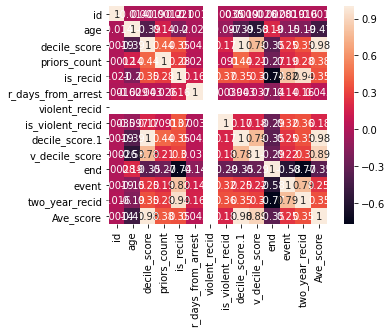

In [23]:
sns.heatmap(numerical_recid.corr(), annot = True, square = True)

### Age vs. decile score and age vs. recidivism

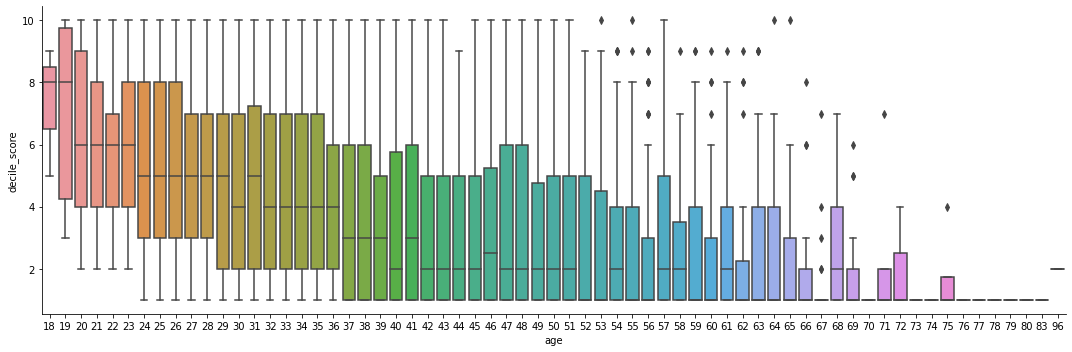

In [24]:
sns.catplot(data=recid, x='age', y='decile_score', kind = 'box', aspect = 3)

In [25]:
numerical_recid['age'].corr(numerical_recid['decile_score'])

-0.38773255375203747

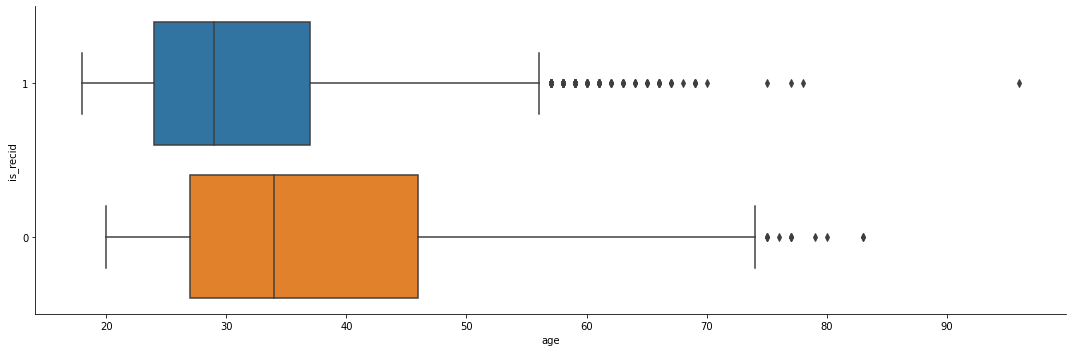

In [26]:
sns.catplot(data=recid, x='age', y='is_recid', aspect = 3, kind = 'box', orient = 'h', order = [1,0])

In [27]:
numerical_recid['age'].corr(numerical_recid['is_recid'])

-0.1973926979824961

## Decile score and recidivism compared by race


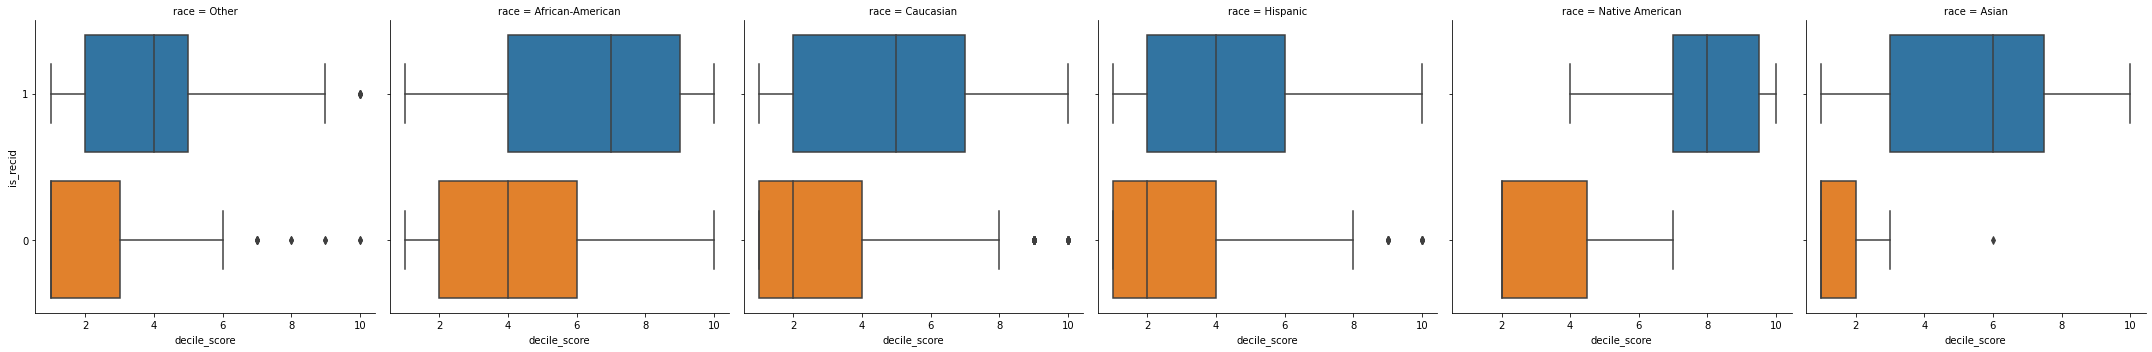

In [28]:
sns.catplot(x="decile_score", y='is_recid', data=recid, kind="box", 
            col='race', orient ='h', order = [1,0], height = 5)

## This group by shows average decile score with average corresponding two year recid value

In [29]:
recid.groupby(['Ave_score'])['two_year_recid'].mean()

Ave_score
1.000000     0.203968
1.333333     0.271676
1.666667     0.298507
2.000000     0.312303
2.333333     0.340058
2.666667     0.368217
3.000000     0.375465
3.333333     0.392453
3.666667     0.399329
4.000000     0.396364
4.333333     0.480565
4.666667     0.535714
5.000000     0.539033
5.333333     0.567901
5.666667     0.513725
6.000000     0.573991
6.333333     0.605381
6.666667     0.601990
7.000000     0.658416
7.333333     0.664804
7.666667     0.728916
8.000000     0.688312
8.333333     0.676829
8.666667     0.720930
9.000000     0.746479
9.333333     0.761905
9.666667     0.805556
10.000000    0.750000
Name: two_year_recid, dtype: float64

### Correlation of Average Score and If they recidivated

In [30]:
recid['two_year_recid'].corr(recid['Ave_score'])

0.35109046729878796

### Hypothesis Test: Caucasian Recid vs. African American Recid

Question: Do afican Amercians recitivate more than caucasians?


In [31]:
caucasian_recid = recid[recid.race == "Caucasian"].two_year_recid
caucasian_recid

6       1
8       0
9       1
10      0
12      0
       ..
7192    0
7194    1
7199    0
7205    1
7206    1
Name: two_year_recid, Length: 2454, dtype: int64

In [32]:
aa_recid = recid[recid.race == "African-American"].two_year_recid
aa_recid

1       1
2       1
3       0
11      1
13      0
       ..
7207    1
7208    0
7209    0
7210    0
7212    0
Name: two_year_recid, Length: 3696, dtype: int64

In [33]:
print("AA: \n" ,aa_recid.describe())
print("Caucasian: \n", caucasian_recid.describe())

AA: 
 count    3696.000000
mean        0.514340
std         0.499862
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: two_year_recid, dtype: float64
Caucasian: 
 count    2454.000000
mean        0.393643
std         0.488657
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: two_year_recid, dtype: float64


In [34]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
tstat, pvalue, ddof = ttest_ind(
                                caucasian_recid,
                                aa_recid                                                       
)

In [35]:
print(pvalue,'\n', tstat,'\n',ddof)

1.1363681614743772e-20 
 -9.355920228380974 
 6148.0


With sucha low p value, we are able to conclude that african americans recitivate more than caucasians 

Earlier, we found that African Americans recieve higher recidivation scores that caucasians. We have now found that they end up recitivating at a higher rate. 

In [36]:
mid_age = recid[recid.age_cat == '25 - 45'].two_year_recid
under_25 = recid[recid.age_cat == 'Less than 25'].two_year_recid
tstat, pvalue, ddof = ttest_ind(
                                mid_age,
                                under_25                                                      
)

In [37]:
print(pvalue)

1.7943713406031644e-12
